## Bike Sharing Assignment
### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue.BoomBikes aspires to understand the demand for shared bikes among the people.They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

In [342]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm

### Reading and Understanding Data

In [343]:
# Load data
bike_df=pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [344]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [345]:
# Check  number of rows and columns
bike_df.shape

(730, 16)

In [346]:
# Check Statistic details
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Check null Values

In [347]:
## Null Handling and Cleaning
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no null values in Dataset. No need to handle it
#### Drop columns which are not required for analysis

In [348]:
## As there are no null vlues no need to handle it
## As instant is index and dteday is date of month and year combination so we can drop these 2 columns. Also Casual and registered get covered in cnt column.
bike_df.drop(["instant","dteday"],axis=1,inplace=True)
bike_df.drop(["casual","registered"],axis=1,inplace=True)

In [349]:
# Inspecting again 
bike_df.shape

(730, 12)

### EDA

In [350]:
## Checking unique values in Dataset
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

##### Convert some numerical column to Categorical columns for more readeability

In [351]:
# As per given data dictionary ..convert values of below columns from Numeric to Category..more meaningful values will help for analysis
# season,weekday,weathersit
bike_df["season"]=bike_df["season"].map({1 : 'Spring',2:"summer",3:"fall",4:"winter"})
bike_df["weekday"]=bike_df["weekday"].map({1 : 'mon',2 : 'tue',3 : 'wed',4 : 'thurs',5:'fri',6:'sat',0:'sun'})
bike_df["weathersit"]=bike_df["weathersit"].map({1 : 'Good',2:"Medium",3:"Bad",4:"Critical"})
bike_df["mnth"]= bike_df["mnth"].map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [352]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,Medium,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,Medium,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [353]:
num_cols=["cnt","temp","hum","windspeed"]
cat_cols=["season","weekday","weathersit","mnth"]


#### Univariate Analysis

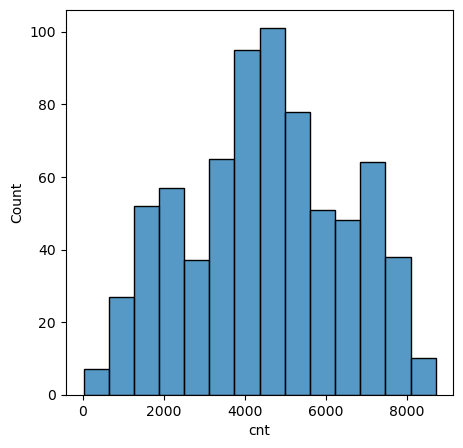

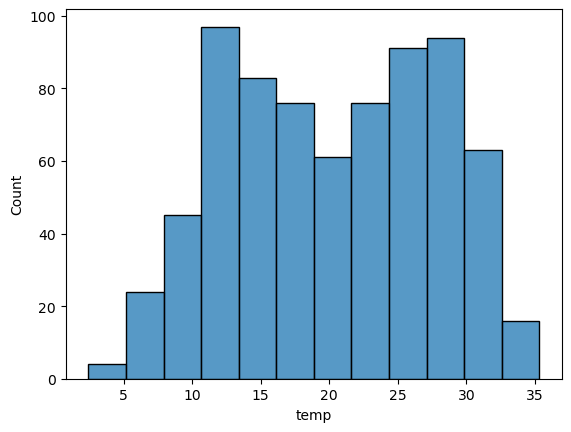

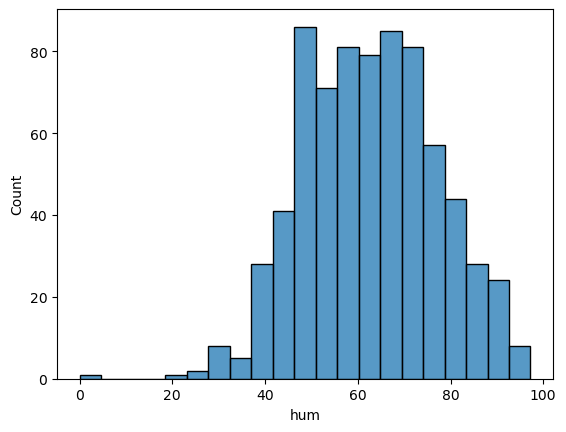

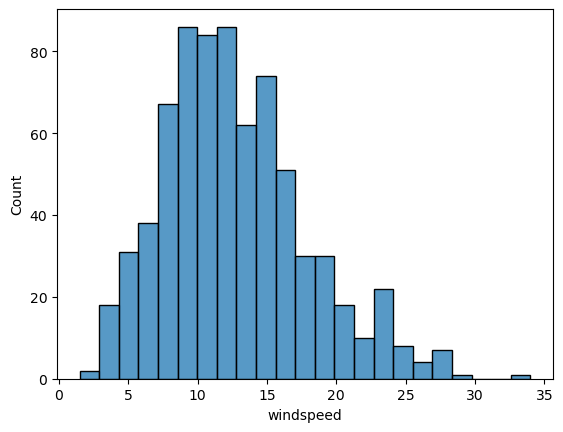

In [354]:
## Numerical Columns
plt.figure(figsize = (5,5))
for i in num_cols:    
    sns.histplot(bike_df[i])
    plt.show()

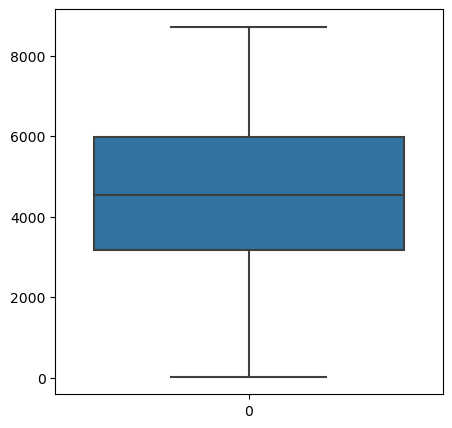

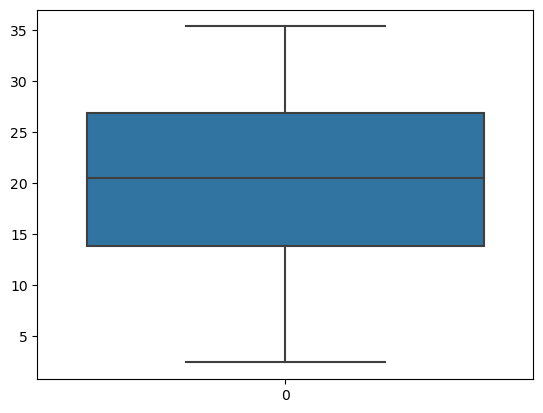

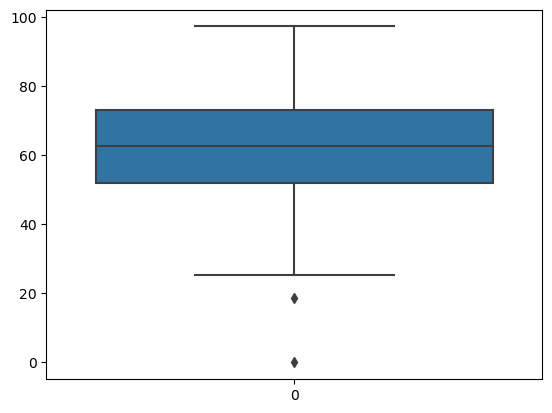

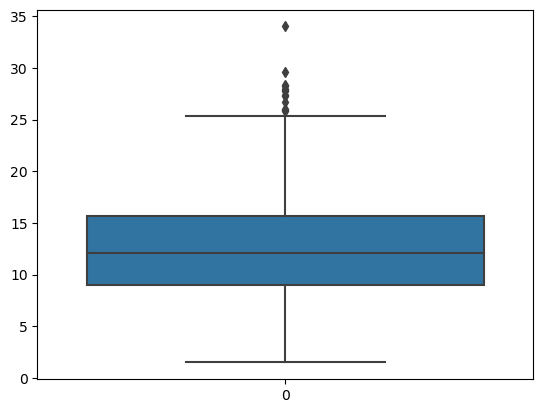

In [355]:
# Check Outliers with boxplot
plt.figure(figsize = (5,5))
for i in num_cols:
    sns.boxplot(bike_df[i])
    plt.show()

#### There are no outliers to remove.

<Figure size 1000x3000 with 0 Axes>

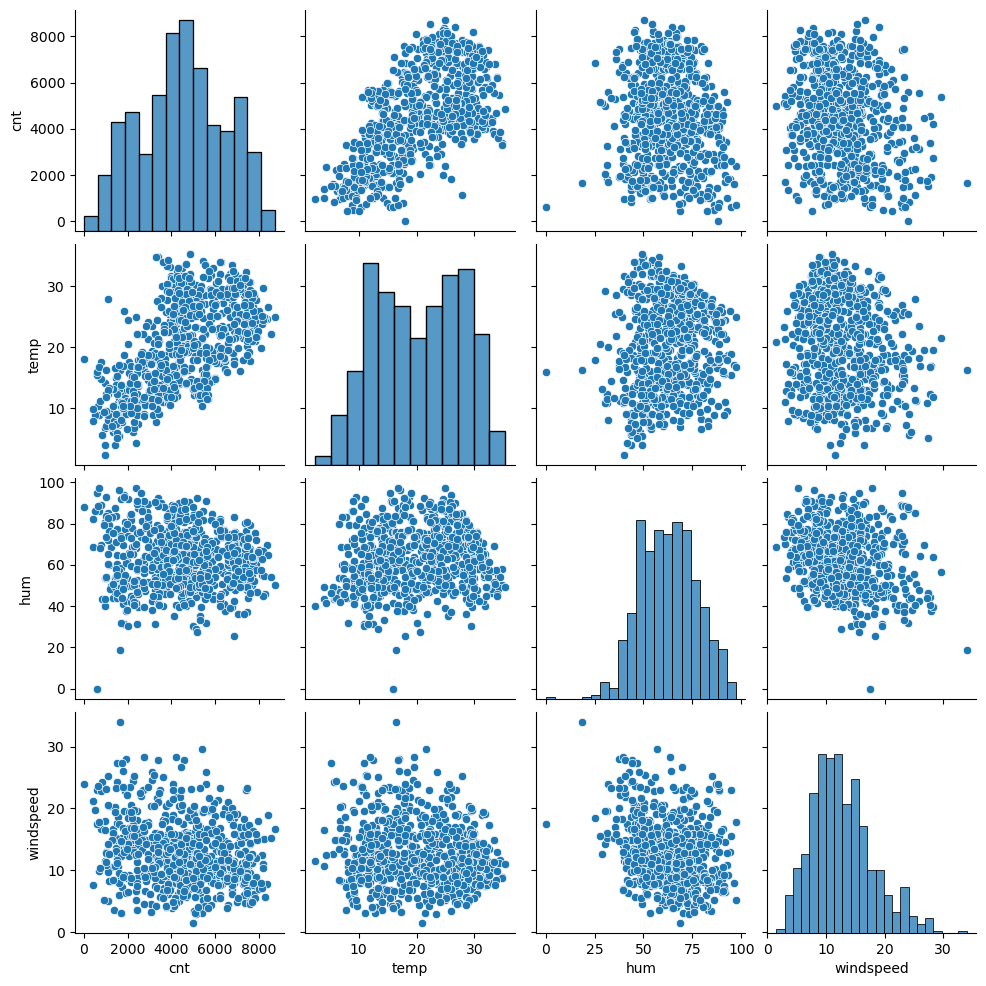

In [356]:
# Plot pairplot to check rlationship between columns
plt.figure(figsize = (10,30))
sns.pairplot(data=bike_df,vars=num_cols)
plt.show()

In [357]:
# Check corelation values
bike_df[num_cols].corr()

,cnt,temp,hum,windspeed
cnt,1.000000,0.627044,-0.098543,-0.235132
temp,0.627044,1.000000,0.128565,-0.158186
hum,-0.098543,0.128565,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.248506,1.000000


#### Inferences: Temp has highest co-relation with target varaible cnt
    

In [358]:
cor=bike_df[num_cols].corr()

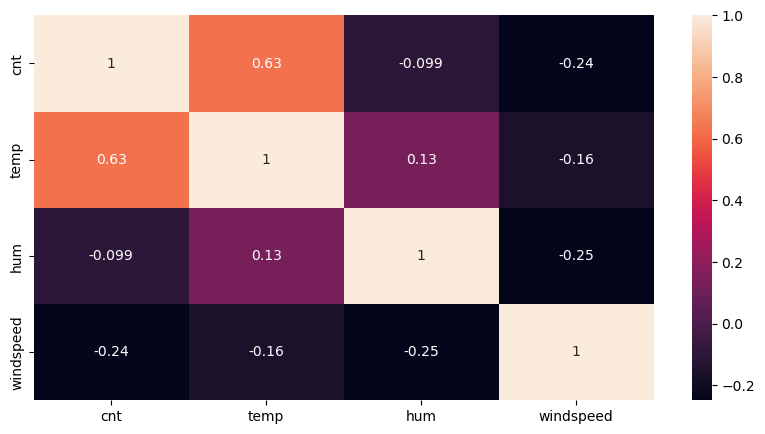

In [359]:
## Analyse heatmap to check co relation values bet variables
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True)
plt.show()

#### Bivariate Analysis
##### Analyze Categorical variables with target variable

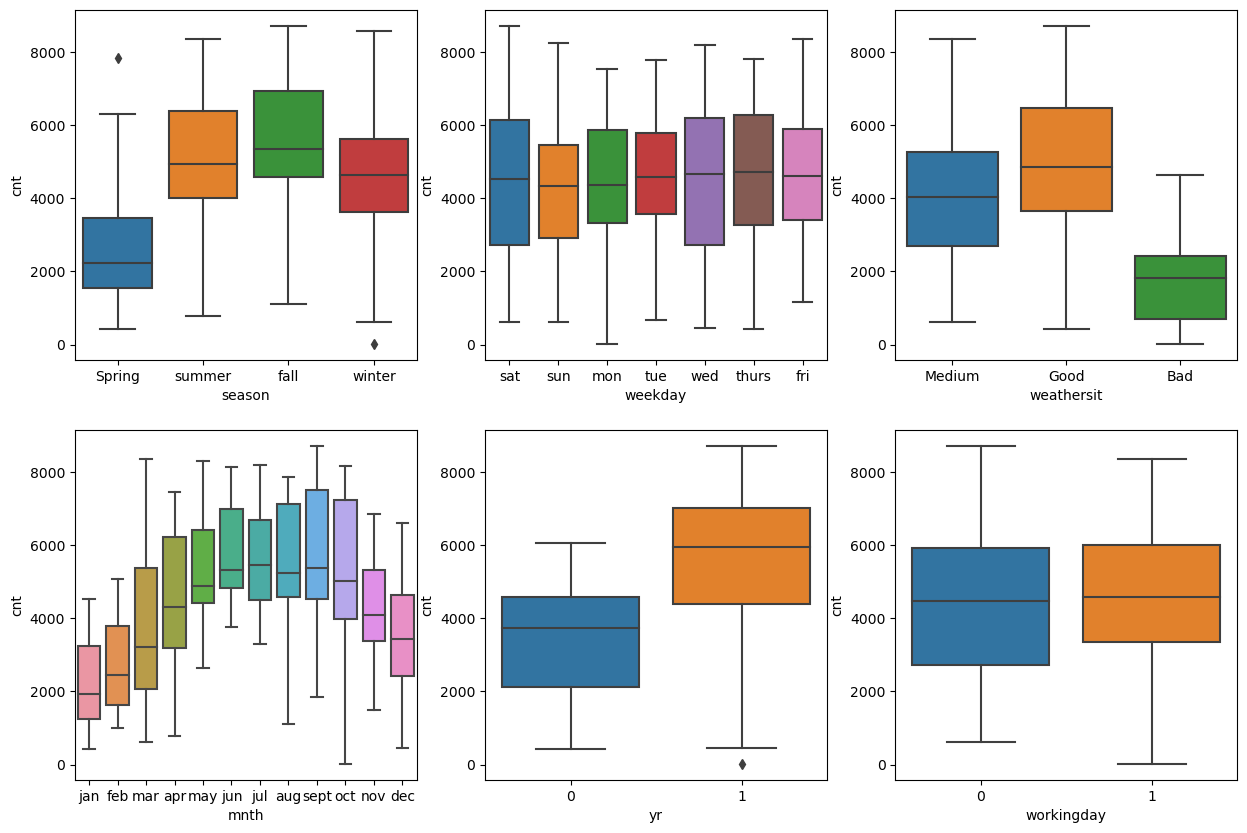

In [360]:
## Categorical column analysis with target variable
cat_cols=["season","weekday","weathersit","mnth","yr","workingday"]
plt.figure(figsize=(15, 10))
for i in enumerate(cat_cols):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()

1. Fall season has highest demand fo bike
2. Friday Saturday Sunday have comparitively more demand than other days.
3. We can see demand is more in mid year from June to September.
4. Good weather that is clear weather has highest demand in bike.

### Data Preparation
##### Create Dummy Variables for categorical columns
      Create n-1 column by deleting first column 

In [361]:
## Create Dummy Variables
bike_df = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday"],drop_first=True)
bike_df = pd.get_dummies(data=bike_df,columns=["weathersit"])

In [362]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Medium
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,False,False,True,False,True,False


## Model Building
### SPlit Training and Test Data

In [363]:
X=bike_df.drop(["cnt"],axis=1)
y=bike_df["cnt"]

In [364]:
# Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [365]:
# Check shape after splitting
print(X_train.shape)
print(X_test.shape)

(584, 30)
(146, 30)


### Scaling
    To make interpretition easy scale variables

In [366]:
scaler = MinMaxScaler()
#scaler=StandardScaler() 
X_train=scaler.fit_transform(X_train) 
X_test=scaler.transform(X_test)# As test data is unseen data we can't fit on it 
X_train_df=pd.DataFrame(X_train,columns=X.columns) 
X_test_df=pd.DataFrame(X_test,columns=X.columns) 
X_train_df.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_fall,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Medium
0,1.0,0.0,1.0,0.113228,0.061963,0.454701,0.695175,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.468352,0.462175,0.477458,0.299450,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [367]:
# stats after scaling
X_train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_fall,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Medium
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.251712,0.246575,0.250000,...,0.080479,0.148973,0.150685,0.154110,0.135274,0.133562,0.154110,0.027397,0.630137,0.342466
std,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.434369,0.431387,0.433384,...,0.272267,0.356367,0.358048,0.361363,0.342309,0.340472,0.361363,0.163378,0.483181,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Build model with all columns 1st time

In [368]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)
model1=sm.OLS(np.array(y_train),X_train_sm) 
res1=model1.fit() 
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.26e-215
Time:                        12:51:24   Log-Likelihood:                -4683.7
No. Observations:                 584   AIC:                             9425.
Df Residuals:                     555   BIC:                             9552.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        772.7384    228.951      3.375      0.001     323.021    1222.456
x1          1993.3960     64.133     31.082      0.000    1867.423    2119.369
x2          -253.7366    178.640     -1.420      0.156    -604.629      97.156
x3           537.7701     90.385      5.950      0.000     360.232     715.308
x4          3324.4277   1175.713      2.828      0.005    1015.036    5633.819
x5           591.2494   1159.116      0.510      0.610   -1685.541    2868.040
x6         -1254.7938    314.267     -3.993      0.000   -1872.092    -637.495
x7         -1555.2089    211.543     -7.352      0.000   -1970.732   -1139.685
x8           490.1325    236.958      2.068      0.039      24.688     955.577
x9           849.7244    194.622      4.366      0.000     467.439    1232.009
x10         1430.6972    198.025      7.225      0.000    1041.727    1819.667
x11          161.5203    269.761      0.599      0.550    -368.357     691.397
x12         -451.3371    267.097     -1.690      0.092    -975.982      73.308
x13         -249.1669    263.774     -0.945      0.345    -767.285     268.951
x14         -510.2897    272.171     -1.875      0.061   -1044.900      24.321
x15         -293.5920    278.775     -1.053      0.293    -841.174     253.990
x16           91.4311    195.977      0.467      0.641    -293.517     476.379
x17           25.5294    203.521      0.125      0.900    -374.237     425.295
x18          164.5890    167.580      0.982      0.326    -164.579     493.757
x19         -436.4241    290.318     -1.503      0.133   -1006.680     133.832
x20          114.9832    281.939      0.408      0.684    -438.815     668.781
x21          677.1943    254.615      2.660      0.008     177.068    1177.321
x22         -215.0291    123.715     -1.738      0.083    -458.036      27.978
x23          507.5000    103.233      4.916      0.000     304.725     710.275
x24          -18.7952    102.937     -0.183      0.855    -220.989     183.399
x25          -87.6522    124.525     -0.704      0.482    -332.250     156.945
x26         -201.7570    124.454     -1.621      0.106    -446.216      42.702
x27          -65.2908    120.894     -0.540      0.589    -302.756     172.175
x28        -1092.1987    179.355     -6.090      0.000   -1444.497    -739.900
x29         1189.5492     87.698     13.564      0.000    1017.288    1361.810
x30          675.3879    100.249      6.737      0.000     478.475     872.301
==============================================================================
Omnibus:                      106.744   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.955
Skew:                          -0.888   Prob(JB):                     6.02e-67
Kurtosis:                       6.062   Cond. No.                     1.19e+16
==

### Feature Selection using RFE

In [369]:
# Select 17 features using RFE
estimator=LinearRegression() 
selector=RFE(estimator,n_features_to_select=17) 
selector=selector.fit(X_train_df,y_train) 

In [370]:
## Selected columns by RFE
list(zip(X_train_df.columns,selector.support_,selector.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_fall', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 8),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 10),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 5),
 ('weekday_thurs', False, 12),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 13),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Medium', True, 1)]

In [371]:
selected_features=X_train_df.columns[selector.support_] 
print(selected_features)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_summer', 'season_winter', 'mnth_dec', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weekday_sat', 'weathersit_Bad',
       'weathersit_Good', 'weathersit_Medium'],
      dtype='object')


In [372]:
X_train=X_train_df[selected_features] 
X_test=X_test_df[selected_features]

### Model 2: Using RFE features

In [373]:
## Build Model using RFE selected Columns

X_train_sm1=sm.add_constant(X_train)
X_test_sm1=sm.add_constant(X_test)
model2=sm.OLS(np.array(y_train),X_train_sm1).fit()
#res2=model2.fit() 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.52e-225
Time:                        12:51:24   Log-Likelihood:                -4691.9
No. Observations:                 584   AIC:                             9418.
Df Residuals:                     567   BIC:                             9492.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               519.4223    203.954      2.547      0.011     118.825     920.019
yr                 1970.7782     63.775     30.902      0.000    1845.514    2096.042
holiday            -455.8219    207.785     -2.194      0.029    -863.945     -47.699
workingday          437.5902     89.070      4.913      0.000     262.643     612.537
temp               4408.1780    277.214     15.902      0.000    3863.686    4952.670
hum               -1339.3486    304.096     -4.404      0.000   -1936.640    -742.057
windspeed         -1565.1945    204.195     -7.665      0.000   -1966.265   -1164.124
season_fall         629.9843    167.484      3.761      0.000     301.020     958.949
season_summer      1033.1039    119.237      8.664      0.000     798.904    1267.303
season_winter      1626.2779    121.305     13.407      0.000    1388.017    1864.539
mnth_dec           -320.8605    129.354     -2.480      0.013    -574.932     -66.789
mnth_jul           -469.7613    145.881     -3.220      0.001    -756.294    -183.229
mnth_nov           -415.6793    148.054     -2.808      0.005    -706.480    -124.879
mnth_sept           586.8345    132.626      4.425      0.000     326.337     847.332
weekday_sat         521.2513    114.189      4.565      0.000     296.966     745.537
weathersit_Bad    -1135.5351    179.122     -6.339      0.000   -1487.360    -783.711
weathersit_Good    1078.2610     68.867     15.657      0.000     942.995    1213.526
weathersit_Medium   576.6964     92.237      6.252      0.000     395.528     757.865
==============================================================================
Omnibus:                       89.234   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.846
Skew:                          -0.765   Prob(JB):                     8.28e-53
Kurtosis:                       5.742   Cond. No.                     2.29e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.73e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [374]:
def get_vif(selected_features):
    X_train_sm = X_train[selected_features]
    vif_data = pd.DataFrame()
    vif_data['Features'] = X_train_sm.columns
    vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range (len(X_train_sm.columns))]
    vif_data['VIF'] = round(vif_data['VIF'],2)
    print(vif_data.sort_values(by='VIF',ascending=False))    


In [375]:
selected_col=['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_summer', 'season_winter', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Medium']


In [376]:
get_vif(selected_features)

             Features    VIF
15    weathersit_Good  33.83
16  weathersit_Medium  25.35
6         season_fall   5.38
3                temp   3.97
14     weathersit_Bad   3.57
8       season_winter   2.81
7       season_summer   2.69
4                 hum   1.95
2          workingday   1.79
13        weekday_sat   1.70
11           mnth_nov   1.65
10           mnth_jul   1.51
9            mnth_dec   1.36
12          mnth_sept   1.33
5           windspeed   1.20
1             holiday   1.17
0                  yr   1.03


In [377]:
#  pvalue is less than 0.05 for columns ,drop columns having very high VIF weathersit_Medium and weathersit_Good 

X_train.drop(["weathersit_Good","weathersit_Medium"],axis=1,inplace=True)
X_test.drop(["weathersit_Good","weathersit_Medium"],axis=1,inplace=True)

In [378]:
X_train_sm2=sm.add_constant(X_train)
X_test_sm2=sm.add_constant(X_test)
model3=sm.OLS(np.array(y_train),X_train_sm2).fit()
#res2=model2.fit() 
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.05e-218
Time:                        12:51:25   Log-Likelihood:                -4709.8
No. Observations:                 584   AIC:                             9452.
Df Residuals:                     568   BIC:                             9522.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2062.0869    222.739      9.258      0.000    1624.595    2499.579
yr              1938.7183     65.475     29.610      0.000    1810.116    2067.321
holiday         -461.4371    214.076     -2.155      0.032    -881.914     -40.960
workingday       398.3730     91.519      4.353      0.000     218.615     578.131
temp            4736.0541    279.993     16.915      0.000    4186.106    5286.003
hum            -2411.7451    253.336     -9.520      0.000   -2909.334   -1914.156
windspeed      -1727.1007    208.530     -8.282      0.000   -2136.684   -1317.517
season_fall      552.6115    172.043      3.212      0.001     214.694     890.529
season_summer    973.5368    122.420      7.952      0.000     733.085    1213.988
season_winter   1614.5562    124.962     12.920      0.000    1369.112    1860.000
mnth_dec        -263.0823    132.901     -1.980      0.048    -524.119      -2.045
mnth_jul        -460.4721    150.290     -3.064      0.002    -755.664    -165.280
mnth_nov        -370.6287    152.341     -2.433      0.015    -669.849     -71.409
mnth_sept        602.2685    136.616      4.408      0.000     333.933     870.604
weekday_sat      477.9176    117.411      4.070      0.000     247.304     708.531
weathersit_Bad -1787.1728    208.850     -8.557      0.000   -2197.385   -1376.961
==============================================================================
Omnibus:                       82.675   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.625
Skew:                          -0.783   Prob(JB):                     1.63e-39
Kurtosis:                       5.210   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [379]:
get_vif(X_train.columns)

          Features    VIF
3             temp  23.67
4              hum  13.02
6      season_fall   7.06
2       workingday   4.85
5        windspeed   3.93
8    season_winter   3.73
7    season_summer   3.52
0               yr   2.04
13     weekday_sat   1.86
11        mnth_nov   1.77
10        mnth_jul   1.63
9         mnth_dec   1.45
12       mnth_sept   1.44
1          holiday   1.18
14  weathersit_Bad   1.10


In [380]:
## Remove temp and humidity as they are having high VIF values
X_train.drop(["hum"],axis=1,inplace=True)
X_test.drop(["hum"],axis=1,inplace=True)

#### Model 4

In [381]:
X_train_sm4=sm.add_constant(X_train)
X_test_sm4=sm.add_constant(X_test)
model4=sm.OLS(np.array(y_train),X_train_sm4).fit() 
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     186.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.13e-201
Time:                        12:51:25   Log-Likelihood:                -4753.1
No. Observations:                 584   AIC:                             9536.
Df Residuals:                     569   BIC:                             9602.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            530.1072    165.687      3.199      0.001     204.674     855.540
yr              2007.2321     70.016     28.668      0.000    1869.710    2144.754
holiday         -415.9479    230.263     -1.806      0.071    -868.217      36.321
workingday       400.0421     98.464      4.063      0.000     206.645     593.439
temp            4321.5189    297.574     14.522      0.000    3737.041    4905.997
windspeed      -1221.8887    216.967     -5.632      0.000   -1648.042    -795.736
season_fall      648.2563    184.782      3.508      0.000     285.319    1011.193
season_summer    980.5450    131.707      7.445      0.000     721.853    1239.237
season_winter   1531.0094    134.112     11.416      0.000    1267.594    1794.425
mnth_dec        -349.3075    142.653     -2.449      0.015    -629.499     -69.116
mnth_jul        -328.0055    161.000     -2.037      0.042    -644.232     -11.779
mnth_nov        -338.6412    163.861     -2.067      0.039    -660.487     -16.795
mnth_sept        476.3562    146.293      3.256      0.001     189.017     763.696
weekday_sat      506.7958    126.279      4.013      0.000     258.767     754.825
weathersit_Bad -2326.6580    216.268    -10.758      0.000   -2751.439   -1901.877
==============================================================================
Omnibus:                       93.190   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.970
Skew:                          -0.879   Prob(JB):                     1.03e-43
Kurtosis:                       5.245   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [382]:
get_vif(X_train.columns)

          Features    VIF
3             temp  17.12
5      season_fall   6.79
2       workingday   4.29
4        windspeed   3.76
7    season_winter   3.73
6    season_summer   3.50
0               yr   2.04
10        mnth_nov   1.75
12     weekday_sat   1.75
9         mnth_jul   1.61
11       mnth_sept   1.42
8         mnth_dec   1.37
1          holiday   1.16
13  weathersit_Bad   1.06


In [383]:
# From above VIF and model summary temp is having high VIF and holiday have negative coeffient and p value as 0.07
# drop temp and holiday
X_train.drop(["holiday","temp"],axis=1,inplace=True)
X_test.drop(["holiday","temp"],axis=1,inplace=True)

#### Model 5

In [384]:
X_train_sm5=sm.add_constant(X_train)
X_test_sm5=sm.add_constant(X_test)
model5=sm.OLS(np.array(y_train),X_train_sm5).fit() 
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.90e-165
Time:                        12:51:25   Log-Likelihood:                -4845.9
No. Observations:                 584   AIC:                             9718.
Df Residuals:                     571   BIC:                             9775.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1826.3946    155.733     11.728      0.000    1520.516    2132.273
yr              2098.9419     81.564     25.734      0.000    1938.740    2259.144
workingday       483.6592    108.203      4.470      0.000     271.135     696.184
windspeed      -1429.8796    253.305     -5.645      0.000   -1927.403    -932.357
season_fall     2681.2438    141.754     18.915      0.000    2402.821    2959.667
season_summer   2226.4076    117.347     18.973      0.000    1995.922    2456.893
season_winter   2482.0749    137.140     18.099      0.000    2212.714    2751.436
mnth_dec        -895.6812    161.060     -5.561      0.000   -1212.024    -579.338
mnth_jul           8.3287    186.414      0.045      0.964    -357.811     374.469
mnth_nov        -960.3596    184.562     -5.203      0.000   -1322.862    -597.857
mnth_sept        361.4647    170.727      2.117      0.035      26.135     696.794
weekday_sat      553.5065    142.301      3.890      0.000     274.009     833.004
weathersit_Bad -2466.0367    252.793     -9.755      0.000   -2962.554   -1969.520
==============================================================================
Omnibus:                       68.336   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.149
Skew:                          -0.682   Prob(JB):                     1.00e-30
Kurtosis:                       4.954   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [385]:
get_vif(X_train.columns)

          Features   VIF
1       workingday  3.46
2        windspeed  3.24
3      season_fall  2.62
5    season_winter  2.49
0               yr  1.94
4    season_summer  1.74
8         mnth_nov  1.66
7         mnth_jul  1.58
10     weekday_sat  1.58
9        mnth_sept  1.42
6         mnth_dec  1.34
11  weathersit_Bad  1.06


In [386]:
# Remove Month July : mnth_jul
X_train.drop(["mnth_jul"],axis=1,inplace=True)
X_test.drop(["mnth_jul"],axis=1,inplace=True)

#### Model 6

In [387]:
X_train_sm6=sm.add_constant(X_train)
X_test_sm6=sm.add_constant(X_test)
model6=sm.OLS(np.array(y_train),X_train_sm6).fit() 
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     159.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.90e-166
Time:                        12:51:25   Log-Likelihood:                -4845.9
No. Observations:                 584   AIC:                             9716.
Df Residuals:                     572   BIC:                             9768.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1826.6215    155.514     11.746      0.000    1521.173    2132.070
yr              2098.9914     81.485     25.759      0.000    1938.944    2259.038
workingday       483.4567    108.014      4.476      0.000     271.305     695.608
windspeed      -1430.0849    253.042     -5.652      0.000   -1927.090    -933.080
season_fall     2684.2592    124.548     21.552      0.000    2439.632    2928.886
season_summer   2226.3815    117.244     18.989      0.000    1996.101    2456.662
season_winter   2482.3968    136.831     18.142      0.000    2213.644    2751.150
mnth_dec        -895.9383    160.817     -5.571      0.000   -1211.802    -580.074
mnth_nov        -960.7350    184.209     -5.215      0.000   -1322.544    -598.926
mnth_sept        359.0828    162.048      2.216      0.027      40.801     677.364
weekday_sat      553.3881    142.152      3.893      0.000     274.184     832.592
weathersit_Bad -2465.8482    252.537     -9.764      0.000   -2961.861   -1969.836
==============================================================================
Omnibus:                       68.367   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.267
Skew:                          -0.682   Prob(JB):                     9.46e-31
Kurtosis:                       4.955   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [388]:
get_vif(X_train.columns)

          Features   VIF
1       workingday  3.46
2        windspeed  3.24
5    season_winter  2.48
0               yr  1.94
3      season_fall  1.89
4    season_summer  1.74
7         mnth_nov  1.65
9      weekday_sat  1.58
6         mnth_dec  1.34
8        mnth_sept  1.28
10  weathersit_Bad  1.06


p-value for all the features is almost 0.0 and R2 is 0.754. VIF is less than 5
Selecting Model 6 as final model as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinearity.
Difference between R-squared and Adjusted R-squared values for this model is veryless.

### Residual Analysis

In [389]:
y_train_prd = model6.predict(X_train_sm6)

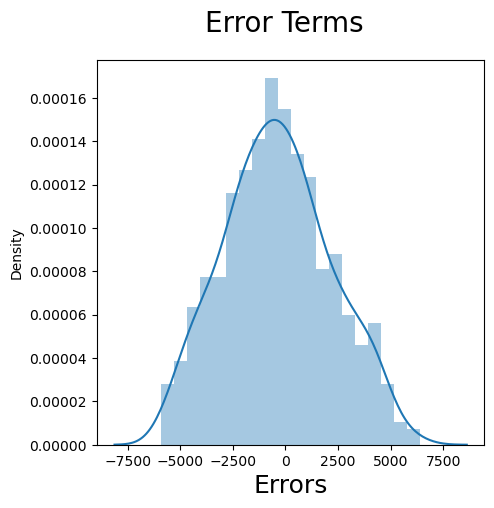

In [390]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(5,5))
sns.distplot((y_train - y_train_prd), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [391]:
#Print R-squared Value
r2_score(y_train,y_train_prd)

0.7535467981460895

### Model Evaluation

In [392]:
# Making Predictions for testdata
y_test_prd = model6.predict(X_test_sm6)

In [393]:
# R-squared Value for test data
r2_score(y_test,y_test_prd)

0.7470420970706428

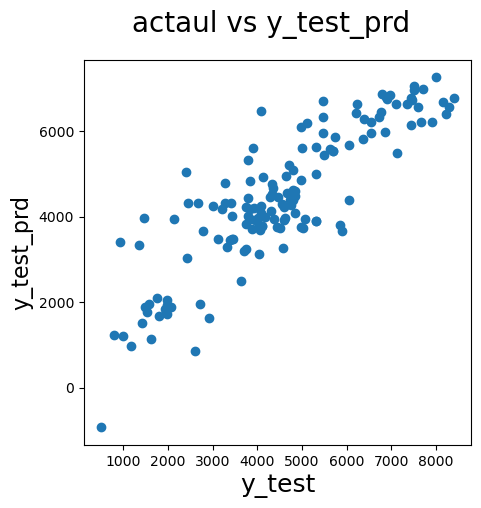

In [394]:
# Plotting actaul y and predicted y value

fig = plt.figure(figsize=(5,5))
plt.scatter(y_test, y_test_prd)
fig.suptitle('actaul vs y_test_prd', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_test_prd', fontsize = 16)
plt.show()

#### R2 value on training data is 0.753 and R2 score on test data is 0.747. This is a good R-squared value, and our model is also performing well even on unseen test data as there no much difference.


### Insights from Model
Analysis and Observations:

Company should expand business in Spring season and in September month and should focus and work on schemes how to attract customers in pleasent weather of spring.

Significant variables to predict the demand for shared bikes

holiday
temp
windspeed
Season
months(JMotly mid year months)
Sunday
weathersit( Light Snow, Mist + Cloudy)